In [1]:
import pandas as pd
import requests
from io import StringIO
from sqlalchemy import create_engine

In [2]:
#Connection with PostgreSQL

# Database connection parameters
host = "localhost"
port = "5432"
database = "blinkit"
user = "postgres"
password = "1357"

# Create the SQLAlchemy engine
engine = create_engine(f"postgresql+psycopg2://{user}:{password}@{host}:{port}/{database}")

In [14]:
query1 = """
SELECT 
    outlet_establishment_year, 
    CAST(SUM(Total_Sales) AS DECIMAL(10,2)) AS total_sales
FROM grocery
GROUP BY 
    outlet_establishment_year
ORDER BY outlet_establishment_year;
"""
df = pd.read_sql(query1, engine)

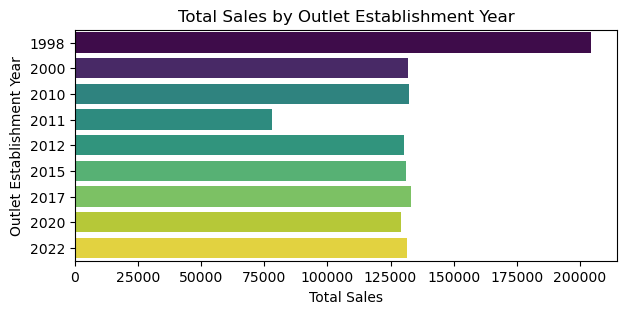

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort values for better visualization
#df = df.sort_values(by="total_sales", ascending=True)

# Plot Horizontal Bar Chart
plt.figure(figsize=(7, 3))
sns.barplot(
    x=df["total_sales"], 
    y=df["outlet_establishment_year"], 
    hue=df["outlet_establishment_year"],  # Assign hue to avoid deprecation warning
    palette='viridis', 
    legend=False,  # Remove redundant legend
    orient='h'  # Ensure it's a horizontal bar chart
)

# Labels and Title
plt.xlabel("Total Sales")
plt.ylabel("Outlet Establishment Year")
plt.title("Total Sales by Outlet Establishment Year")

# Show the plot
plt.show()


In [3]:
query2 = """
SELECT 
    item_fat_content AS Fat_Content,
    CAST(SUM(total_sales)/1000 AS DECIMAL(10,2)) AS Total_Sales,
    CAST(AVG(total_sales) AS DECIMAL(10,1)) AS Average_Sales,
    COUNT(*) AS Number_of_Items,
    CAST(AVG(rating) AS DECIMAL(10,2)) AS Average_Rating
FROM grocery
--WHERE outlet_establishment_year = 2022
GROUP BY item_fat_content
ORDER BY Total_Sales DESC;

"""
df1 = pd.read_sql(query2, engine)

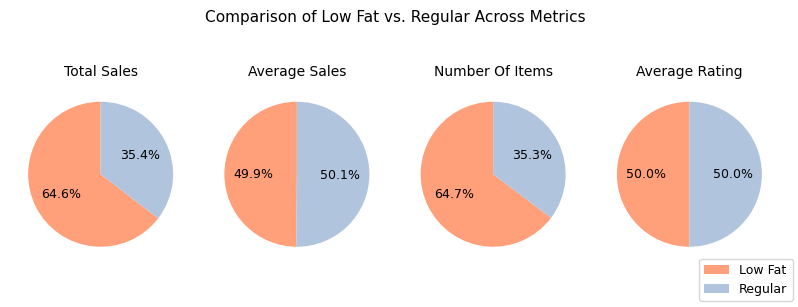

In [10]:
import matplotlib.pyplot as plt

# List of metrics to plot
metrics = ["total_sales", "average_sales", "number_of_items", "average_rating"]

# Define colors
colors = {"Low Fat": "lightsalmon", "Regular": "lightsteelblue"}

# Create subplots (1 row, 4 columns)
fig, axes = plt.subplots(1, 4, figsize=(8, 3))  
fig.suptitle("Comparison of Low Fat vs. Regular Across Metrics", fontsize=11)

# Set background color
#fig.set_facecolor("lightgrey")  # Set figure background color

# Loop through each metric and create a pie chart
for i, metric in enumerate(metrics):
    values = df1[metric].astype(float)  # Convert to numeric

    # Set individual axes background color
    #axes[i].set_facecolor("lightgrey")  

    # Create pie chart with percentages (no category labels)
    wedges, texts, autotexts = axes[i].pie(
        values, autopct="%1.1f%%", colors=[colors[label] for label in df1["fat_content"]], 
        startangle=90, textprops={"fontsize": 9}
    )

    # Set title
    axes[i].set_title(metric.replace("_", " ").title(), fontsize=10)

# Create a single legend for the entire figure
fig.legend(labels=colors.keys(), loc="lower right",fontsize=9)

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()


In [30]:
query3 = """
SELECT 
    item_type,
    CAST(SUM(total_sales) AS DECIMAL(10,2)) AS Total_Sales,
    CAST(AVG(total_sales) AS DECIMAL(10,1)) AS Average_Sales,
    COUNT(*) AS Number_of_Items,
    CAST(AVG(rating) AS DECIMAL(10,2)) AS Average_Rating
FROM grocery
--WHERE outlet_establishment_year = 2022
GROUP BY item_type
ORDER BY Total_Sales DESC;
"""
df2 = pd.read_sql(query3, engine)

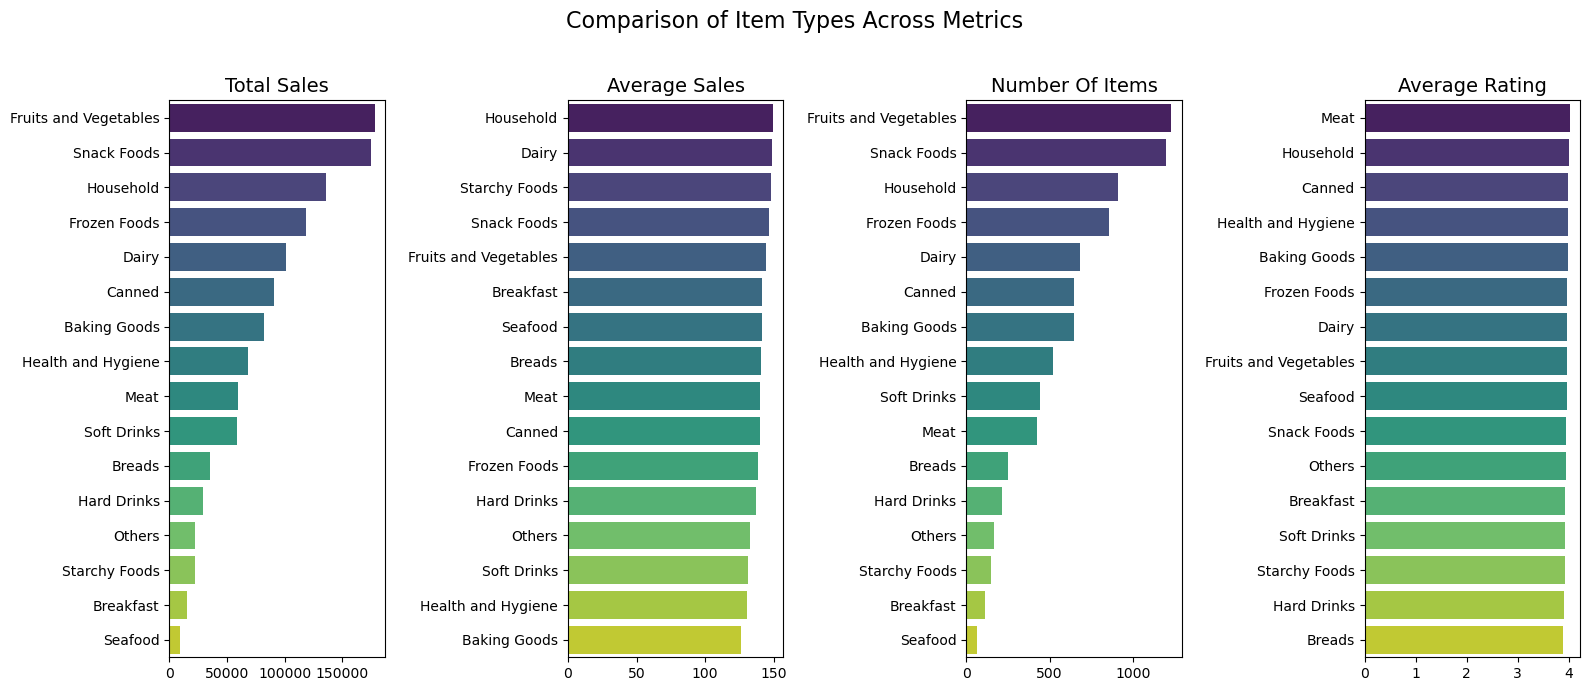

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of metrics to plot
metrics = ["total_sales", "average_sales", "number_of_items", "average_rating"]

# Create subplots (1 row, 4 columns)
fig, axes = plt.subplots(1, 4, figsize=(16, 7))  
fig.suptitle("Comparison of Item Types Across Metrics", fontsize=16)

# Loop through each metric and create a sorted horizontal bar chart
for i, metric in enumerate(metrics):
    sorted_df = df2.sort_values(by=metric, ascending=False)  # Sort each metric independently
    
    sns.barplot(
        x=sorted_df[metric], 
        y=sorted_df["item_type"],
        hue=sorted_df["item_type"],  # Fix for palette warning
        palette="viridis",  
        ax=axes[i]
    )

    axes[i].set_title(metric.replace("_", " ").title(), fontsize=14)
    axes[i].set_xlabel("")  
    axes[i].set_ylabel("")  # Keep y-axis labels for each chart

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plots
plt.show()
